<a href="https://colab.research.google.com/github/shabeeb248/Chennai-house-price-prediction/blob/main/Chennai_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

First thing first , we import our libraries and dataset and then we see the head of the data to know how the data looks like and use describe function to see the percentile’s and other key statistics.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import mpl_toolkits
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 
from scipy import stats
sns.set_style('whitegrid')
import warnings
warnings.simplefilter(action='ignore')


In [2]:
df = pd.read_csv('/content/train-chennai-sale.csv')
df.head(10)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
5,P00219,Chrompet,1220,11-09-2014,36,2.0,1.0,4,Partial,No,...,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750
6,P09105,Chrompet,1167,05-04-2007,137,1.0,1.0,3,Partial,No,...,AllPub,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790
7,P09679,Velachery,1847,13-03-2006,176,3.0,2.0,5,Family,No,...,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250
8,P03377,Chrompet,771,06-04-2011,175,1.0,1.0,2,AdjLand,No,...,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,257578,33236,8308970
9,P09623,Velachery,1635,22-06-2006,74,2.0,1.0,4,AbNormal,No,...,ELO,No Access,I,3.1,3.1,3.3,3.160,323346,121255,8083650


In [3]:
df.shape

(7109, 22)

In [4]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

#Data cleaning

Removing unwanted columns

In [5]:
df= df.drop(['PRT_ID', 'UTILITY_AVAIL', 'REG_FEE', 'COMMIS','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'],axis='columns')

In [6]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,2.366734e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  STREET         7109 non-null   object 
 12  MZZONE         7109 non-null   object 
 13  SALES_PRICE    7109 non-null   int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 777.7+ KB


In [8]:
#checking the null values
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        1
N_BATHROOM       5
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
STREET           0
MZZONE           0
SALES_PRICE      0
dtype: int64

In [9]:
#drop all null values

df=df.dropna()
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
STREET           0
MZZONE           0
SALES_PRICE      0
dtype: int64


In the given data some of the columns data type are not suitable.so we are changing DATE_SALE and DATE_BUILD in to `datetime` formate also N_BEDROOM and N_BATHROOM in to` int` format

In [10]:
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])

In [11]:
df['N_BEDROOM']=df['N_BEDROOM'].astype(int)  
df['N_BATHROOM']=df['N_BATHROOM'].astype(int) 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7103 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7103 non-null   object        
 1   INT_SQFT       7103 non-null   int64         
 2   DATE_SALE      7103 non-null   datetime64[ns]
 3   DIST_MAINROAD  7103 non-null   int64         
 4   N_BEDROOM      7103 non-null   int64         
 5   N_BATHROOM     7103 non-null   int64         
 6   N_ROOM         7103 non-null   int64         
 7   SALE_COND      7103 non-null   object        
 8   PARK_FACIL     7103 non-null   object        
 9   DATE_BUILD     7103 non-null   datetime64[ns]
 10  BUILDTYPE      7103 non-null   object        
 11  STREET         7103 non-null   object        
 12  MZZONE         7103 non-null   object        
 13  SALES_PRICE    7103 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(6)
memory usage: 832.4+ KB


In [13]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [14]:
print(df['AREA'].value_counts())

Chrompet      1679
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     780
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
TNagar           5
Chormpet         5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64


the misspelled words are replaced using `replace() `inbuilt function.

In [15]:
df['AREA'] = df['AREA'].replace(['T Nagar','TNagar'],'T.Nagar')
df['AREA'] = df['AREA'].replace(['Chrompt','Chrmpet','Chormpet'],'Chrompet')
df['AREA'] = df['AREA'].replace(['Ann Nagar','Ana Nagar'],'Anna Nagar')
df['AREA'] = df['AREA'].replace(['KKNagar'],'KK Nagar')
df['AREA'] = df['AREA'].replace(['Adyr'],'Adyar')
df['AREA'] = df['AREA'].replace(['Velchery'],'Velachery')
df['AREA'] = df['AREA'].replace(['Karapakam'],'Karapakkam')

In [16]:
print(df['AREA'].value_counts())

Chrompet      1699
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     785
Adyar          774
T.Nagar        501
Name: AREA, dtype: int64


In [17]:
df.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [18]:
df['PARK_FACIL'] = df['PARK_FACIL'].replace(['Noo'],'No')

In [19]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [20]:
df['BUILDTYPE'] = df['BUILDTYPE'].replace(['Other'],'Others')
df['BUILDTYPE'] = df['BUILDTYPE'].replace(['Comercial'],'Commercial')

In [21]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [22]:
df['STREET'] = df['STREET'].replace(['Pavd'],'Paved')
df['STREET'] = df['STREET'].replace(['NoAccess'],'No Access')

In [23]:
df.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [24]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [25]:
df['SALE_COND'] = df['SALE_COND'].replace(['Ab Normal'],'AbNormal')
df['SALE_COND'] = df['SALE_COND'].replace(['PartiaLl','Partiall'],'Partial')
df['SALE_COND'] = df['SALE_COND'].replace(['Adj Land'],'AdjLand')

In [26]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [27]:
df

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,STREET,MZZONE,SALES_PRICE
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,Paved,A,7600000
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,Gravel,RH,21717770
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,Gravel,RL,13159200
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,Paved,I,9630290
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,Gravel,C,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,2011-03-01,51,1,1,2,AdjLand,No,1962-01-15,Others,No Access,RM,5353000
7105,Velachery,1897,2004-08-04,52,3,2,5,Family,Yes,1995-11-04,Others,No Access,RH,10818480
7106,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,No,1978-01-09,House,Gravel,I,8351410
7107,Karapakkam,787,2009-03-08,40,1,1,2,Partial,Yes,1977-11-08,Commercial,Paved,RL,8507000


**AGE OF HOUSE**

from the data by using DATE_SALE and DATE_BUILD we can easily calculate the age of house.

In [28]:
df['AGE'] = (round(((df['DATE_SALE'] - df['DATE_BUILD']).dt.days)/365.2425)).astype(int) 

In [29]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,STREET,MZZONE,SALES_PRICE,AGE
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,Paved,A,7600000,44
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,Gravel,RH,21717770,11
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,Gravel,RL,13159200,20
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,Paved,I,9630290,22
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,Gravel,C,7406250,30


**Price_Per_Sqft**

In [30]:
df["Price_Per_Sqft"] = df["SALES_PRICE"] /df["INT_SQFT"]
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,STREET,MZZONE,SALES_PRICE,AGE,Price_Per_Sqft
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,Paved,A,7600000,44,7569.721116
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,Gravel,RH,21717770,11,10935.433031
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,Gravel,RL,13159200,20,14476.567657
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,Paved,I,9630290,22,5191.530997
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,Gravel,C,7406250,30,6040.986949


In [31]:
df['YEAR'] = pd.DatetimeIndex(df['DATE_SALE']).year
df['MONTH'] = pd.DatetimeIndex(df['DATE_SALE']).month
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,STREET,MZZONE,SALES_PRICE,AGE,Price_Per_Sqft,YEAR,MONTH
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,Paved,A,7600000,44,7569.721116,2011,4
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,Gravel,RH,21717770,11,10935.433031,2006,12
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,Gravel,RL,13159200,20,14476.567657,2012,4
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,Paved,I,9630290,22,5191.530997,2010,3
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,Gravel,C,7406250,30,6040.986949,2009,5


#Distribution of data

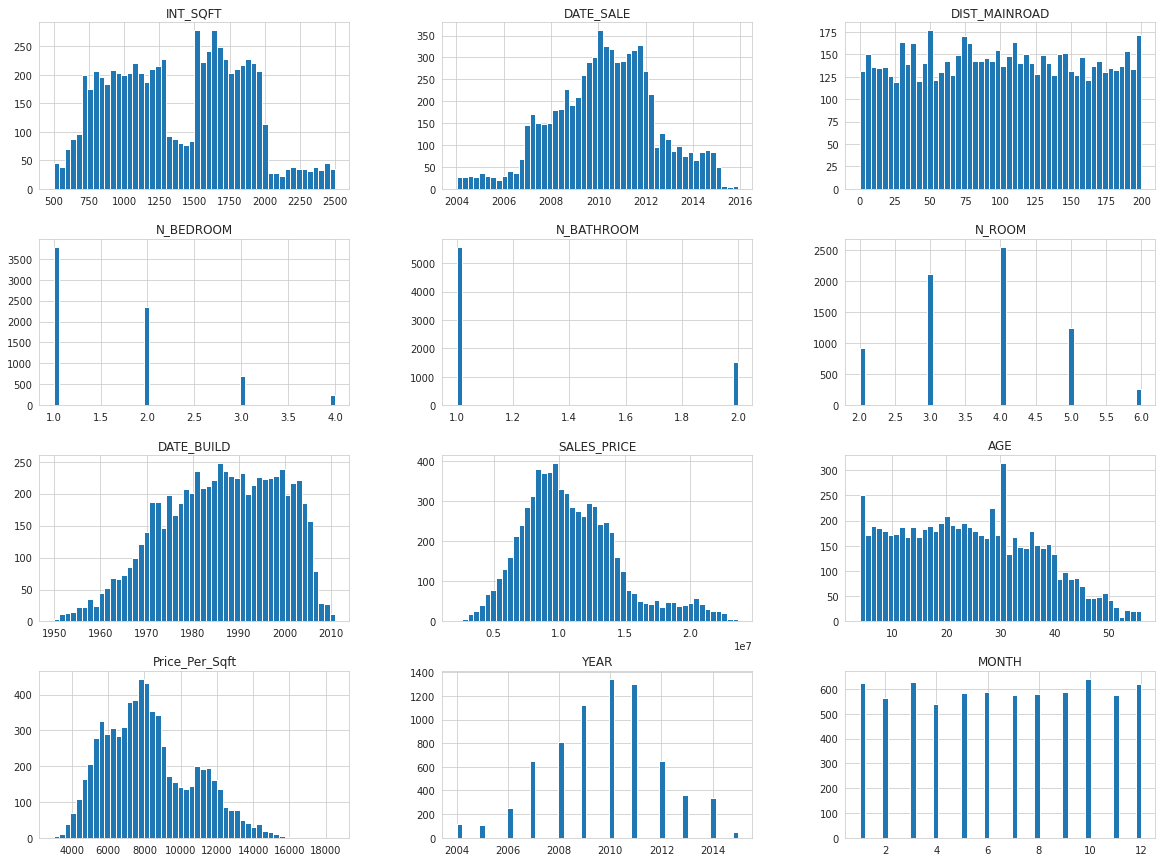

In [46]:
# Lets look at the distribution of all the numeric variables
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [47]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'STREET', 'MZZONE', 'SALES_PRICE', 'AGE', 'Price_Per_Sqft',
       'YEAR', 'MONTH'],
      dtype='object')

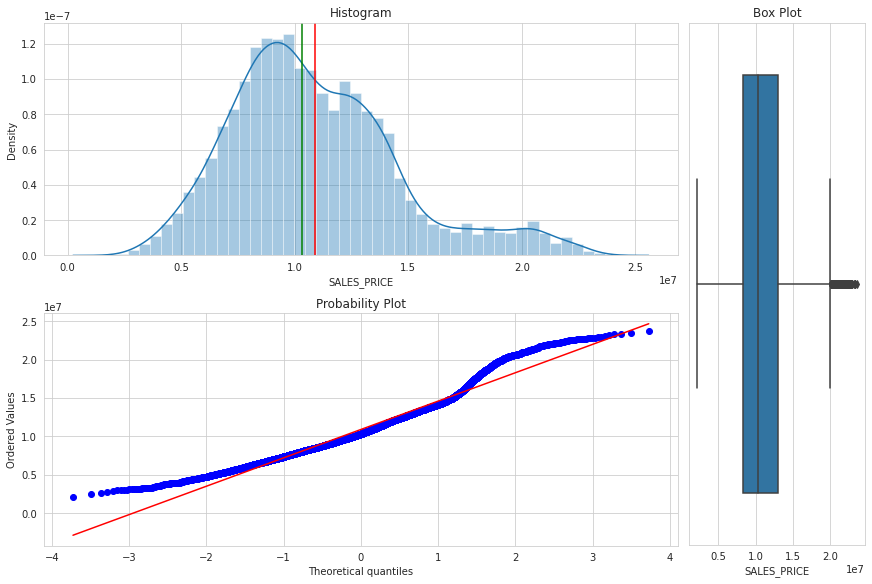

In [48]:
def three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient = 'v', ax = ax3 )
    
three_chart_plot(df, 'SALES_PRICE')

From the above plots, we can observe that the Sales Price is not normally distributed. From the boxplot we can observe that the dataset have a number of outliers.
Red line in histogram indicates the mean of the SalePrice and the Green line indicates the median

For the probability plot, the red line represents those points which would have been plotted for y-axis points if those were normally distributed. But the blue points represents the actual scenario. We can see that there is a lot of deviation on the both the ends i.e on the top right and bottom left.

In [49]:
from scipy.stats import skew
print("Skewness of the SalesPrice is", df['SALES_PRICE'].skew())

Skewness of the SalesPrice is 0.7733205390616096


Text(0, 0.5, 'Count')

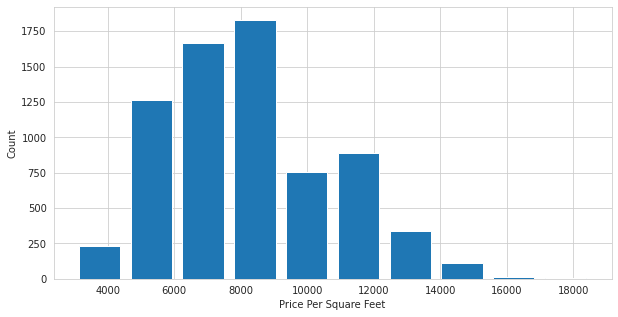

In [50]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,5)
plt.hist(df.Price_Per_Sqft,rwidth=.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [51]:
fig1=px.histogram(df,x='AREA',color='AREA',title='<b>Area wise distribution of data')
fig1

In [52]:
fig2=px.scatter(df,x="INT_SQFT",color="INT_SQFT",title='<b>SQFT wise distribution of data')
fig2

In [53]:
fig3=px.histogram(df,x="DIST_MAINROAD",color="DIST_MAINROAD",title='<b>distribution of data based on distance from main road')
fig3

In [54]:
fig4=fig3=px.histogram(df,x="N_BEDROOM",color="N_BEDROOM",title='<b>distribution of data based on NUMBER OF BEDROOMS')
fig4

In [55]:
fig4=fig3=px.histogram(df,x="N_ROOM",color="N_ROOM",title='<b>distribution of data based on total number of rooms')
fig4

In [56]:
a=df['SALE_COND'].unique()
b=df['SALE_COND'].value_counts()
fig5=px.pie(df,values=b,names=a,color=b,title='<b>Distribution of condition of sales')
fig5

In [57]:
fig6=fig3=px.histogram(df,x="AGE",color="AGE",title='<b>distribution of data based on age of house')
fig6

#Exploratory Data Analysis (EDA)

In [58]:
import plotly.express as px
df1=df.groupby(["YEAR"])["Price_Per_Sqft"].mean().to_frame(name="Average Price_Per_Sqft").reset_index()
fig = px.line(df1, x="YEAR", y="Average Price_Per_Sqft")
fig.show()

The average price per sqft shows a gradual increse through out the years

In [59]:
df1=df.groupby(["YEAR",'AREA'])["Price_Per_Sqft"].mean().to_frame(name="Average Price_Per_Sqft").reset_index()
fig = px.line(df1, x="YEAR", y="Average Price_Per_Sqft", color='AREA')
fig.show()


In [60]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [61]:

df1=df.groupby(["YEAR",'BUILDTYPE'])["Price_Per_Sqft"].mean().to_frame(name="Average Price_Per_Sqft").reset_index()
fig = px.line(df1, x="YEAR", y="Average Price_Per_Sqft", color='BUILDTYPE')
fig.show()

In [102]:
df1=df.groupby(["INT_SQFT",'BUILDTYPE'])["Price_Per_Sqft"].mean().to_frame(name="Average Price_Per_Sqft").reset_index()
fig = px.scatter(df1, x="INT_SQFT", y="Average Price_Per_Sqft", color='BUILDTYPE')
fig.show()

In [63]:
df1=df.groupby(["YEAR",'BUILDTYPE'])["SALES_PRICE"].mean().to_frame(name="AVERAGE SALES PRICE").reset_index()
fig = px.line(df1, x="YEAR", y="AVERAGE SALES PRICE", color='BUILDTYPE')
fig.show()

from the above three charts it is visible that the price per Sqft is decreasing with respect increasing Sqft.For the same SqftTvalue commercial buildings are more expensive than others.

In [64]:
df1=df.groupby(["YEAR",'PARK_FACIL'])["SALES_PRICE"].mean().to_frame(name="AVERAGE SALES PRICE").reset_index()
fig = px.line(df1, x="YEAR", y="AVERAGE SALES PRICE", color='PARK_FACIL')
fig.show()

In [65]:
df1=df.groupby(["YEAR",'PARK_FACIL'])["Price_Per_Sqft"].mean().to_frame(name="AVERAGE Price_Per_Sqft").reset_index()
fig = px.line(df1, x="YEAR", y="AVERAGE Price_Per_Sqft", color='PARK_FACIL')
fig.show()

In [101]:
df1=df.groupby(["INT_SQFT",'PARK_FACIL'])["SALES_PRICE"].mean().to_frame(name="Average sale price").reset_index()
fig = px.scatter(df1, x="INT_SQFT", y="Average sale price", color='PARK_FACIL')
fig.show()

In [100]:
df1=df.groupby(["INT_SQFT",'PARK_FACIL'])["Price_Per_Sqft"].mean().to_frame(name="Average Price_Per_Sqft").reset_index()
fig = px.scatter(df1, x="INT_SQFT", y="Average Price_Per_Sqft", color='PARK_FACIL')
fig.show()

From the above charts it is clear that parking facility is significant factor in deciding house price.houses with parking facility shows high price than houses without parking facility.

In [68]:
df1=df.groupby(["YEAR",'AREA'])["SALES_PRICE"].mean().to_frame(name="AVERAGE SALES_PRICE").reset_index()
fig = px.line(df1, x="YEAR", y="AVERAGE SALES_PRICE", color='AREA')
fig.show()

In [69]:
df1=df.groupby(["YEAR",'AREA'])["Price_Per_Sqft"].mean().to_frame(name="Avg Price_Per_Sqft").reset_index()
fig = px.line(df1, x="YEAR", y="Avg Price_Per_Sqft", color='AREA')
fig.show()

In [98]:
df1=df.groupby(["DIST_MAINROAD",'AREA'])["Price_Per_Sqft"].mean().to_frame(name="AVERAGE Price_Per_Sqft").reset_index()
fig2=px.scatter(df1,x="DIST_MAINROAD",y="AVERAGE Price_Per_Sqft",color='AREA',title=' AVERAGE Price_Per_Sqft vs DISTANCE FROM MAINROAD ')
fig2.show()

In [99]:
df1=df.groupby(["DIST_MAINROAD",'AREA'])["SALES_PRICE"].mean().to_frame(name="AVERAGE SALES_PRICE").reset_index()
fig2=px.scatter(df1,x="DIST_MAINROAD",y="AVERAGE SALES_PRICE",color='AREA',title='AVERAGE SALES_PRICE vs DISTANCE FROM MAINROAD')
fig2.show()

Houses from anna nagar are more expensive than others.

In [72]:
df4=df.groupby(["MONTH"])["MONTH"].count().to_frame(name="NO OF SALES").reset_index()
fig = px.bar(df4,
             x='MONTH',
             y='NO OF SALES',
             title='NO OF SALES IN EACH MONTH',
             barmode='stack')

fig.show()

In [73]:
df4

,MONTH,NO OF SALES
0,1,625
1,2,564
2,3,628
3,4,538
4,5,582
5,6,587
6,7,574
7,8,581
8,9,588
9,10,639


In [74]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'STREET', 'MZZONE', 'SALES_PRICE', 'AGE', 'Price_Per_Sqft',
       'YEAR', 'MONTH'],
      dtype='object')

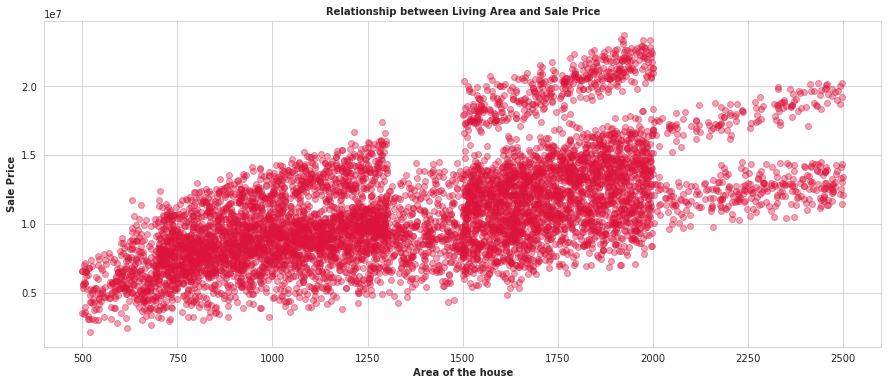

In [75]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'INT_SQFT', y = 'SALES_PRICE', data = df, color='crimson', alpha=0.4)
plt.title('Relationship between Living Area and Sale Price', weight = 'bold', fontsize = 10)
plt.xlabel('Area of the house', weight = 'bold')
plt.ylabel('Sale Price', weight = 'bold')
plt.show()

We can observe that there is almost a linear relationship between Living Area and the Sale Price. If the area is huge then price should also have also been high but the two rightmost points suggest something else. These two points are outliers. We will drop both of them below.

In [97]:
#df1=df.groupby(["DIST_MAINROAD",'AREA'])["SALES_PRICE"].mean().to_frame(name="AVERAGE SALES_PRICE").reset_index()
fig2=px.scatter(df,x="INT_SQFT",y="SALES_PRICE",color='AREA',title='AVERAGE SALES_PRICE vs AREA')
fig2.show()

In [96]:
fig2=px.scatter(df,x="INT_SQFT",y="SALES_PRICE",color='PARK_FACIL',title='AVERAGE SALES_PRICE vs DPARK_FACIL')
fig2.show()

In [78]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'STREET', 'MZZONE', 'SALES_PRICE', 'AGE', 'Price_Per_Sqft',
       'YEAR', 'MONTH'],
      dtype='object')

In [103]:
fig2=px.scatter(df,x="INT_SQFT",y="SALES_PRICE",color='SALE_COND',title='AVERAGE SALES_PRICE vs SALE_COND')
fig2.show()

In [104]:
fig2=px.scatter(df,x="INT_SQFT",y="SALES_PRICE",color='BUILDTYPE',title='AVERAGE SALES_PRICE vs BUILDTYPE')
fig2.show()

In [105]:
fig2=px.scatter(df,x="INT_SQFT",y="SALES_PRICE",color='STREET',title='AVERAGE SALES_PRICE vs STREET')
fig2.show()

In [106]:
fig2=px.scatter(df,x="INT_SQFT",y="SALES_PRICE",color='MZZONE',title='AVERAGE SALES_PRICE vs MZZONE')
fig2.show()

In [107]:
fig2=px.scatter(df,x="INT_SQFT",y="SALES_PRICE",color='SALE_COND',title='AVERAGE SALES_PRICE vs DISTANCE FROM MAINROAD')
fig2.show()

In [108]:
fig2=px.scatter(df,x="INT_SQFT",y="SALES_PRICE",color='N_ROOM',title='AVERAGE SALES_PRICE vs DISTANCE FROM MAINROAD')
fig2.show()

In [109]:
fig2=px.scatter(df,x="INT_SQFT",y="DIST_MAINROAD",color='STREET',title='SQFT vs DISTANCE FROM MAINROAD')
fig2.show()

In [86]:
df

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,STREET,MZZONE,SALES_PRICE,AGE,Price_Per_Sqft,YEAR,MONTH
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,Paved,A,7600000,44,7569.721116,2011,4
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,Gravel,RH,21717770,11,10935.433031,2006,12
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,Gravel,RL,13159200,20,14476.567657,2012,4
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,Paved,I,9630290,22,5191.530997,2010,3
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,Gravel,C,7406250,30,6040.986949,2009,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,2011-03-01,51,1,1,2,AdjLand,No,1962-01-15,Others,No Access,RM,5353000,49,8951.505017,2011,3
7105,Velachery,1897,2004-08-04,52,3,2,5,Family,Yes,1995-11-04,Others,No Access,RH,10818480,9,5702.941487,2004,8
7106,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,No,1978-01-09,House,Gravel,I,8351410,29,5174.355638,2006,8
7107,Karapakkam,787,2009-03-08,40,1,1,2,Partial,Yes,1977-11-08,Commercial,Paved,RL,8507000,31,10809.402795,2009,3


# **Correlation Study**

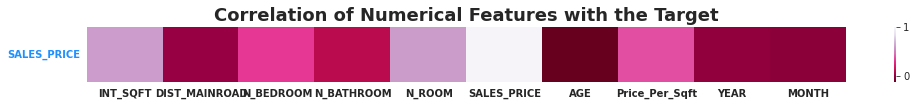

In [ ]:
num = df.select_dtypes(exclude = 'object')
corr_num = num.corr()

f, ax = plt.subplots(figsize = (17, 1))

sns.heatmap(corr_num.sort_values(by = ['SALES_PRICE'], ascending = False).head(1), cmap='PuRd_r')

plt.title('Correlation of Numerical Features with the Target', weight = 'bold', fontsize = 18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

plt.show()

In [ ]:
correlation = df.corr()['SALES_PRICE'].sort_values(ascending = False).to_frame().head(10)

cmap = sns.light_palette("cyan", as_cmap = True)

s = correlation.style.background_gradient(cmap = cmap)

s

,SALES_PRICE
SALES_PRICE,1.000000
INT_SQFT,0.612026
N_ROOM,0.602637
Price_Per_Sqft,0.388301
N_BEDROOM,0.330933
N_BATHROOM,0.108884
DIST_MAINROAD,0.018679
YEAR,0.001311
MONTH,-0.012796
AGE,-0.119576


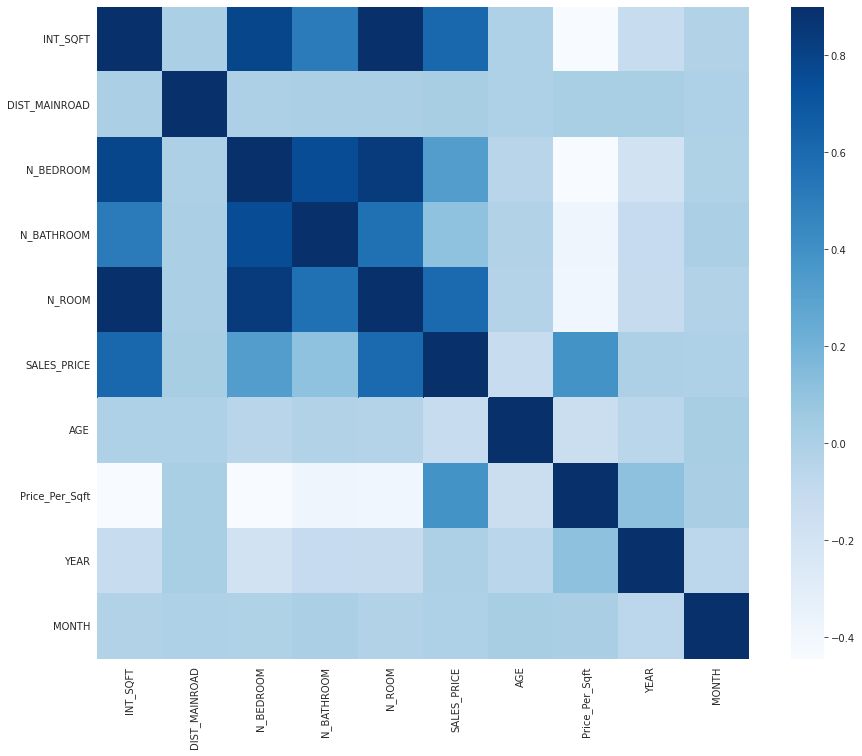

In [ ]:
corr = df.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

From the above table, we can conclude that better the overall quality of the house, more will be the price of the house which is also true in real life. Same is true for the living area i.e as the area increases, more will be the Sale Price.

Let's plot a graph to examine the relationship between GrLivArea and the SalePrice

In [ ]:
df

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,STREET,MZZONE,SALES_PRICE,AGE,Price_Per_Sqft,YEAR,MONTH
0,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,Paved,A,7600000,44,7569.721116,2011,4
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,Gravel,RH,21717770,11,10935.433031,2006,12
2,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,1992-09-02,Commercial,Gravel,RL,13159200,20,14476.567657,2012,4
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,Paved,I,9630290,22,5191.530997,2010,3
4,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,1979-10-13,Others,Gravel,C,7406250,30,6040.986949,2009,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,2011-03-01,51,1,1,2,AdjLand,No,1962-01-15,Others,No Access,RM,5353000,49,8951.505017,2011,3
7105,Velachery,1897,2004-08-04,52,3,2,5,Family,Yes,1995-11-04,Others,No Access,RH,10818480,9,5702.941487,2004,8
7106,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,No,1978-01-09,House,Gravel,I,8351410,29,5174.355638,2006,8
7107,Karapakkam,787,2009-03-08,40,1,1,2,Partial,Yes,1977-11-08,Commercial,Paved,RL,8507000,31,10809.402795,2009,3


#Label Encoding 
Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning

In [117]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['AREA']= le.fit_transform(df['AREA'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
#do  mapping

{'Adyar': 0, 'Anna Nagar': 1, 'Chrompet': 2, 'KK Nagar': 3, 'Karapakkam': 4, 'T.Nagar': 5, 'Velachery': 6}


In [118]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['MZZONE']= le.fit_transform(df['MZZONE'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'A': 0, 'C': 1, 'I': 2, 'RH': 3, 'RL': 4, 'RM': 5}


In [119]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['STREET']= le.fit_transform(df['STREET'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)


{'Gravel': 0, 'No Access': 1, 'Paved': 2}


In [120]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['SALE_COND']= le.fit_transform(df['SALE_COND'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'AbNormal': 0, 'AdjLand': 1, 'Family': 2, 'Normal Sale': 3, 'Partial': 4}


In [121]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['PARK_FACIL']= le.fit_transform(df['PARK_FACIL'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'No': 0, 'Yes': 1}


In [122]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['BUILDTYPE']= le.fit_transform(df['BUILDTYPE'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Commercial': 0, 'House': 1, 'Others': 2}


In [123]:
df

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,STREET,MZZONE,SALES_PRICE,AGE,Price_Per_Sqft,YEAR,MONTH
0,4,1004,2011-04-05,131,1,1,3,0,1,1967-05-15,0,2,0,7600000,44,7569.721116,2011,4
1,1,1986,2006-12-19,26,2,1,5,0,0,1995-12-22,0,0,3,21717770,11,10935.433031,2006,12
2,0,909,2012-04-02,70,1,1,3,0,1,1992-09-02,0,0,4,13159200,20,14476.567657,2012,4
3,6,1855,2010-03-13,14,3,2,5,2,0,1988-03-18,2,2,2,9630290,22,5191.530997,2010,3
4,4,1226,2009-05-10,84,1,1,3,0,1,1979-10-13,2,0,1,7406250,30,6040.986949,2009,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,4,598,2011-03-01,51,1,1,2,1,0,1962-01-15,2,1,5,5353000,49,8951.505017,2011,3
7105,6,1897,2004-08-04,52,3,2,5,2,1,1995-11-04,2,1,3,10818480,9,5702.941487,2004,8
7106,6,1614,2006-08-25,152,2,1,4,3,0,1978-01-09,1,0,2,8351410,29,5174.355638,2006,8
7107,4,787,2009-03-08,40,1,1,2,4,1,1977-11-08,0,2,4,8507000,31,10809.402795,2009,3


#Model building

#Regression models
There are numerous regression analysis approaches available for making predictions. Additionally, the choice of technique is determined by various parameters, including the number of independent variables, the form of the regression line, and the type of dependent variable.here by we are using different regression models to predict the price of house.



In [126]:

from sklearn.model_selection import train_test_split # data split
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

In [127]:
X_var = df[['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL',
       'BUILDTYPE', 'STREET', 'MZZONE', 'AGE']].values
y_var = df['SALES_PRICE'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)




**Ordinary Least Squares regression (OLS)**

it is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression).

In [128]:
# 1. OLS
from sklearn.linear_model import LinearRegression # OLS algorithm
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)
print('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)))
print('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)))

Explained Variance Score of OLS model is 0.7906151993793448
R-Squared of OLS model is 0.7905898953429937


In [129]:
score=ols.score( X_test,y_test)
print(score*100," %")

79.05898953429937  %


**Ridge Regression**

When data exhibits multicollinearity, that is, the ridge regression technique is applied when the independent variables are highly correlated.

In [130]:
# 2. Ridge
from sklearn.linear_model import Ridge # Ridge algorithm
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)
print('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)))
print('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)))

Explained Variance Score of Ridge model is 0.7906071887678611
R-Squared of Ridge model is 0.790581829953433


In [131]:
score=ridge.score( X_test,y_test)
print(score*100," %")

79.0581829953433  %


**Lasso Regression**

As with ridge regression, the lasso (Least Absolute Shrinkage and Selection Operator) technique penalizes the absolute magnitude of the regression coefficient. Additionally, the lasso regression technique employs variable selection, which leads to the shrinkage of coefficient values to absolute zero.

In [132]:
# 3. Lasso
from sklearn.linear_model import Lasso # Lasso algorithm
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)
print('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)))
print('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)))

Explained Variance Score of Lasso model is 0.7906151989550296
R-Squared of Lasso model is 0.7905898949130991


In [133]:
score=lasso.score( X_test,y_test)
print(score*100," %")

79.0589894913099  %


**Bayesian Linear Regression**


Bayesian linear regression is a form of regression analysis technique used in machine learning that uses Bayes’ theorem to calculate the regression coefficients’ values. Rather than determining the least-squares, this technique determines the features’ posterior distribution

In [134]:
# 4. Bayesian
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)
print('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)))
print('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)))

Explained Variance Score of Bayesian model is 0.7905662608383888
R-Squared of Bayesian model is 0.7905406288616994


In [135]:
score=bayesian.score( X_test,y_test)
print(score*100," %")

79.05406288616994  %


**Elastic Net Regression**

Elastic net regression combines ridge and lasso regression techniques that are particularly useful when dealing with strongly correlated data. It regularizes regression models by utilizing the penalties associated with the ridge and lasso regression methods.

In [136]:
# 5. ElasticNet
from sklearn.linear_model import ElasticNet # ElasticNet algorithm
en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)
print('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)))
print('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)))


Explained Variance Score of ElasticNet is 0.7900638808600209
R-Squared of ElasticNet is 0.7900354356195641


In [137]:
score=en.score( X_test,y_test)
print(score*100," %")

79.00354356195642  %


In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix


import warnings  
warnings.filterwarnings('ignore')

In [139]:
X= df[['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL',
       'BUILDTYPE', 'STREET', 'MZZONE', 'AGE']].values
y= df['SALES_PRICE'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

#Decision Tree

In [140]:
from sklearn.tree import DecisionTreeRegressor
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)
print(expl_tr)

0.963175405831662


#Random Forest Regression Model

Random forest works by building multiple trees on random subset of features and averaging out their predictions.

In [141]:
rf_regressor = RandomForestRegressor(n_estimators=100,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)
print(expl_rf)

0.9829941353343048


from the all models we can see that RANDOM FOREST REGRESSION works better for the prediction purpose with a score of 98%.

In [142]:
y_pred = rf_regressor.predict(X_test)

finding errors..

In [143]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 378118.57517597376
Mean Squared Error: 230555571827.36972
Root Mean Squared Error: 480162.0266403516


The RMSE tells us that model has typical prediction error of ₹480310.so the predicted values are also varying this much from the actual value.so we set a range value by considering this error. 

#Predicting house price 

In [145]:
# Predicting a New Value 
a=input('Enter the Area (Adyar: 0, Anna Nagar: 1, Chrompet: 2, KK Nagar: 3, Karapakkam: 4, T.Nagar: 5, Velachery: 6) : ')
b=input('Enter the SQFT : ')
c=input('Enter the distance from main road : ')
d=input('Enter number of bedrooms : ')
e=input('Enter number of bathrooms : ')
f=input('Enter number of total rooms : ')
g=input('Enter sales condition (AbNormal: 0, AdjLand: 1, Family: 2, Normal Sale: 3, Partial: 4) : ')
h=input('Enter parking facility (No: 0, Yes: 1) : ')
i=input('Enter build type (Commercial: 0, House: 1, Others: 2) : ')
j=input('Enter street type (Gravel: 0, No Access: 1, NoAccess: 2, Paved: 3) : ')
k=input('Enter MZ zone (A: 0, C: 1, I: 2, RH: 3, RL: 4, RM: 5) :  ')
l=input('Enter the age of house  :  ')
y_pred = rf_regressor.predict([[a,b,c,d,e,f,g,h,i,j,k,l]])
x=float(y_pred[0])
print("Price range : ", round(x-240000)," - ",round(x+240000))

Enter the Area (Adyar: 0, Anna Nagar: 1, Chrompet: 2, KK Nagar: 3, Karapakkam: 4, T.Nagar: 5, Velachery: 6) : 1
Enter the SQFT : 1000
Enter the distance from main road : 23
Enter number of bedrooms : 4
Enter number of bathrooms : 2
Enter number of total rooms : 5
Enter sales condition (AbNormal: 0, AdjLand: 1, Family: 2, Normal Sale: 3, Partial: 4) : 1
Enter parking facility (No: 0, Yes: 1) : 1
Enter build type (Commercial: 0, House: 1, Others: 2) : 2
Enter street type (Gravel: 0, No Access: 1, NoAccess: 2, Paved: 3) : 2
Enter MZ zone (A: 0, C: 1, I: 2, RH: 3, RL: 4, RM: 5) :  3
Enter the age of house  :  14
Price range :  9115148  -  9595148


Using grid search to fine tune the model Random forest

In [146]:

from sklearn.model_selection import GridSearchCV
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit( X_test,y_test)
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [147]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1263245.4990127578 {'max_features': 2, 'n_estimators': 3}
1004649.5823975026 {'max_features': 2, 'n_estimators': 10}
876483.8840852175 {'max_features': 2, 'n_estimators': 30}
928223.8842817685 {'max_features': 4, 'n_estimators': 3}
740232.375515306 {'max_features': 4, 'n_estimators': 10}
657703.788300294 {'max_features': 4, 'n_estimators': 30}
836361.5172275972 {'max_features': 6, 'n_estimators': 3}
679347.7382190271 {'max_features': 6, 'n_estimators': 10}
630597.5395415844 {'max_features': 6, 'n_estimators': 30}
842121.345568297 {'max_features': 8, 'n_estimators': 3}
688019.4799952181 {'max_features': 8, 'n_estimators': 10}
644317.0197752175 {'max_features': 8, 'n_estimators': 30}
1188100.0840360436 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
930215.2618239238 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
941964.1058633268 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
716686.9051225444 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

#Understanding Feature Importance

In [148]:
a=df[['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL',
       'BUILDTYPE', 'STREET', 'MZZONE', 'AGE']]
feature_scores = pd.Series(rf_regressor .feature_importances_, index=a.columns).sort_values(ascending=False)

feature_scores

INT_SQFT         0.403003
BUILDTYPE        0.317774
MZZONE           0.117295
AREA             0.080663
N_BEDROOM        0.030738
PARK_FACIL       0.014414
N_BATHROOM       0.009488
STREET           0.008059
AGE              0.006308
N_ROOM           0.005498
DIST_MAINROAD    0.003926
SALE_COND        0.002833
dtype: float64

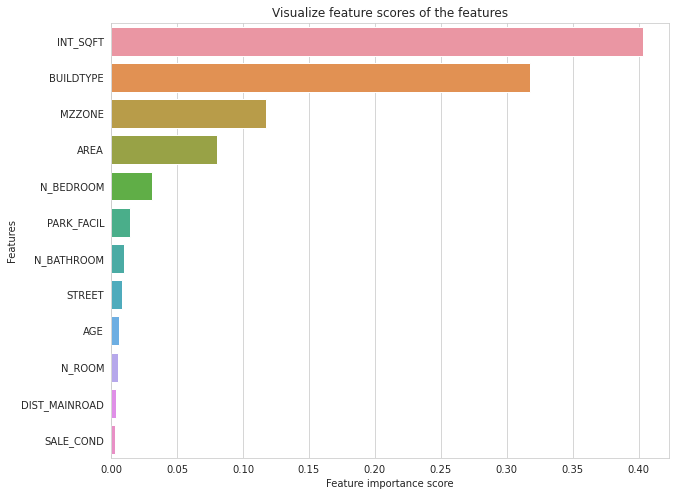

In [149]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()